<a href="https://colab.research.google.com/github/vishwaseco/gitdemo/blob/main/Retail_pricing_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving retail_price.xls to retail_price.xls


In [ ]:
df = pd.read_csv(list(uploaded.keys())[0])   # read the uploaded file as CSV
df.head()

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_1,ps1,fp1,comp_2,ps2,fp2,comp_3,ps3,fp3,lag_price
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.95,39,161,2,...,89.9,3.9,15.011897,215.000000,4.4,8.760000,45.95,4.0,15.100000,45.90
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.95,39,161,2,...,89.9,3.9,14.769216,209.000000,4.4,21.322000,45.95,4.0,12.933333,45.95
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.95,39,161,2,...,89.9,3.9,13.993833,205.000000,4.4,22.195932,45.95,4.0,14.840000,45.95
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.95,39,161,2,...,89.9,3.9,14.656757,199.509804,4.4,19.412885,45.95,4.0,14.287500,45.95
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.95,39,161,2,...,89.9,3.9,18.776522,163.398710,4.4,24.324687,45.95,4.0,15.100000,45.95


In [ ]:
#  Check for Missing Values
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64


PHASE 1

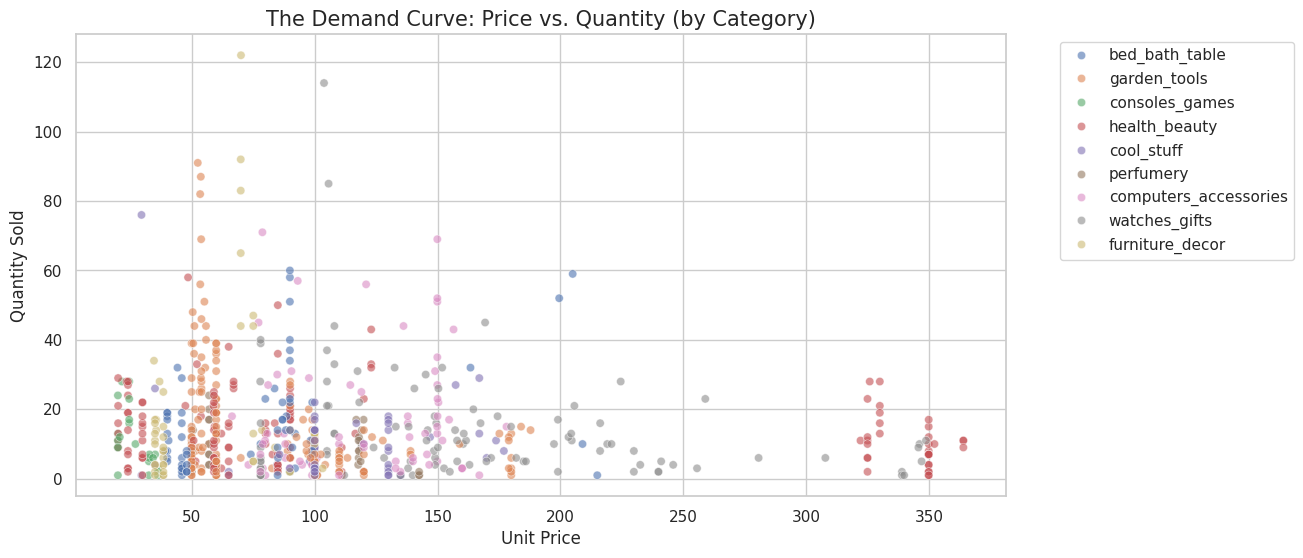

In [ ]:
# Set the visual style
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))

# We use a Scatter Plot to visualize individual data points
# 'hue' helps us see if different categories behave differently
sns.scatterplot(data=df, x='unit_price', y='qty', hue='product_category_name', alpha=0.6)

plt.title("The Demand Curve: Price vs. Quantity (by Category)", fontsize=15)
plt.xlabel("Unit Price")
plt.ylabel("Quantity Sold")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.show()

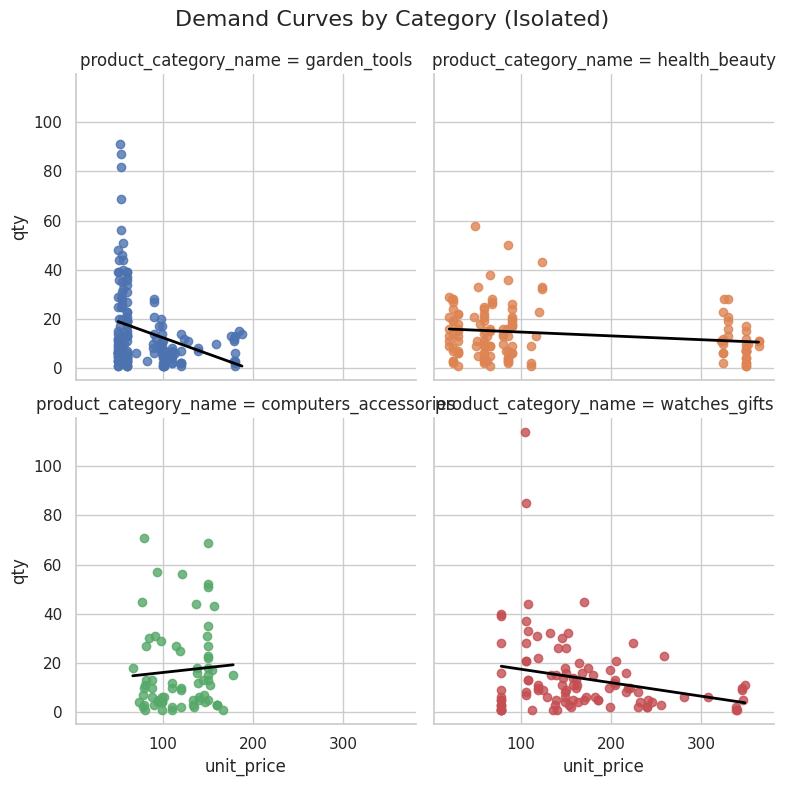

In [ ]:
# 1. Identify the Top 4 Categories by data volume
# We want to focus on categories where we have enough data points to see a trend
top_categories = df['product_category_name'].value_counts().nlargest(4).index

# 2. Filter the dataframe to only include these top categories
df_filtered = df[df['product_category_name'].isin(top_categories)]

# 3. Create a Faceted Plot (Small Multiples)
# col='product_category_name' creates a separate plot for each category
# ci=None removes the confidence interval shading to make it cleaner
sns.lmplot(data=df_filtered, x='unit_price', y='qty',
           col='product_category_name',
           hue='product_category_name',
           col_wrap=2, height=4, ci=None,
           line_kws={'color': 'black', 'linewidth': 2}) # Make the trend line black and thick

plt.subplots_adjust(top=0.9)
plt.suptitle('Demand Curves by Category (Isolated)', fontsize=16)
plt.show()

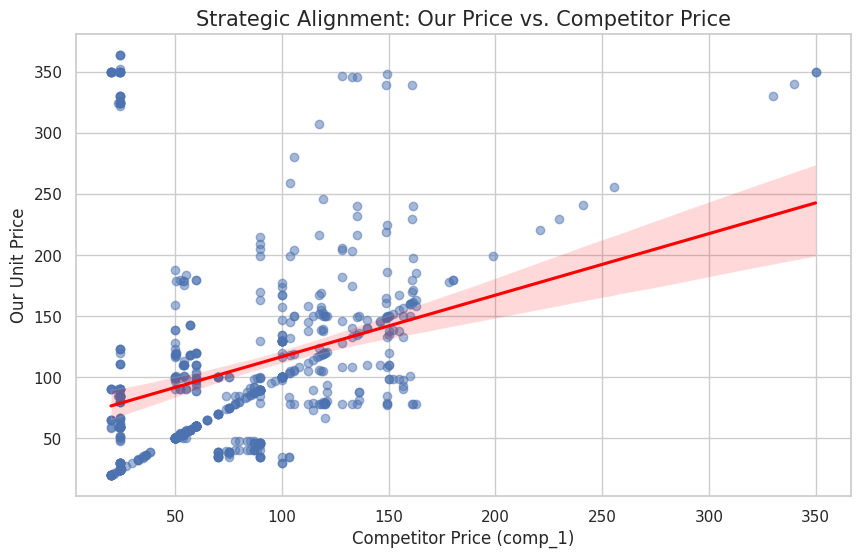

Correlation between Our Price and Competitor Price: 0.32


In [ ]:
plt.figure(figsize=(10, 6))

# Plotting Our Price vs Competitor Price
sns.regplot(data=df, x='comp_1', y='unit_price',
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title("Strategic Alignment: Our Price vs. Competitor Price", fontsize=15)
plt.xlabel("Competitor Price (comp_1)")
plt.ylabel("Our Unit Price")
plt.show()

# Calculate the actual correlation number
correlation = df['unit_price'].corr(df['comp_1'])
print(f"Correlation between Our Price and Competitor Price: {correlation:.2f}")

PHASE 2 : Naive ML

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Select Features (X) and Target (y)
# We focus on the core economic drivers
features = ['unit_price', 'comp_1', 'product_score', 'freight_price']
target = 'qty'

X = df[features]
y = df[target]

# 2. Split the data (80% for training, 20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize and Train the Random Forest
# We use 100 trees (n_estimators=100)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Make Predictions
y_pred = rf_model.predict(X_test)

# 5. Evaluate Accuracy
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("--- Baseline Model Performance ---")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-Squared (R2): {r2:.2f}")
# Note: R2 represents how much variance we explain. Closer to 1 is better.

--- Baseline Model Performance ---
Mean Absolute Error (MAE): 10.48
R-Squared (R2): 0.21


/tmp/ipython-input-2810519342.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')


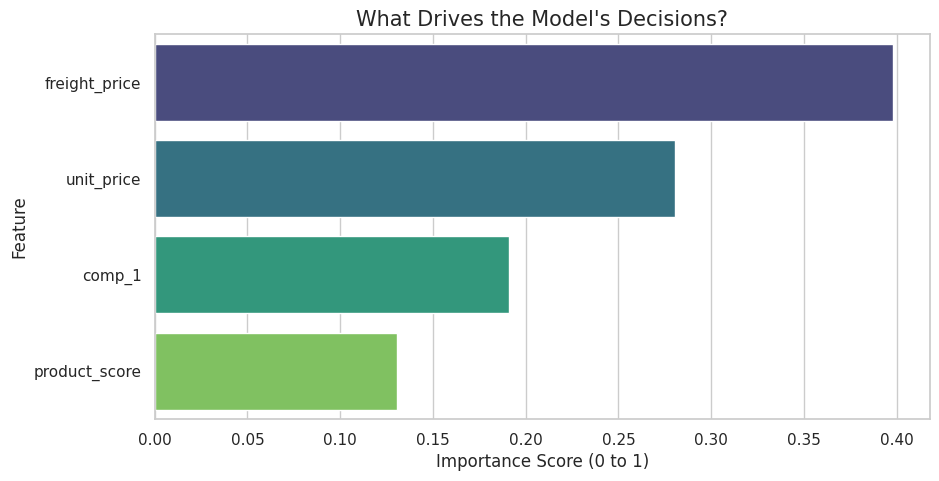

In [ ]:
# Create a DataFrame to visualize importance
importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=importance, x='Importance', y='Feature', palette='viridis')
plt.title("What Drives the Model's Decisions?", fontsize=15)
plt.xlabel("Importance Score (0 to 1)")
plt.show()

This is a critical finding.

    R² = 0.21: This model is weak. It only explains 21% of what is happening.

    Freight is #1: The model thinks shipping cost is the biggest driver of your sales.

    Quality is Last: The model is completely ignoring product quality (product_score).

The Economist's Verdict: This model is unsafe for pricing. If we used this to set prices, the algorithm would obsess over lowering shipping costs rather than finding the optimal product price. It has succumbed to "Omitted Variable Bias" and noise.

We must move to Causal Inference to force the model to look at the relationship we actually care about: Price vs. Quantity.

Phase 3: Causal Inference (Double Machine Learning)

The Economic Logic: We are going to use a technique called Double Machine Learning (DML). Think of it as a "Noise Filter" that runs in two steps:

    Filter 1 (The Outcome Filter): We use a Random Forest to predict qty using only the control variables (Freight, Competitors, Score). We subtract this prediction from the actual qty. The "leftover" (residual) is the part of demand that isn't explained by shipping or competitors.

    Filter 2 (The Treatment Filter): We use a Random Forest to predict unit_price using the same controls. We subtract this from the actual price. The "leftover" is the pure price variation.

    The Result: We compare the "Leftover Qty" vs. "Leftover Price". The relationship between them is the True Price Elasticity.

In [ ]:
!pip install econml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.4/259.4 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: shap
    Found existing installation: shap 0.50.0
    Uninstalling shap-0.50.0:
      Successfully uninstalled shap-0.50.0


CAUSAL ML

In [ ]:
from econml.dml import LinearDML
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

print("--- Starting Causal Inference ---")

# 1. Define our Variables
# Y = Outcome (Quantity)
# T = Treatment (Our Price)
# X = Confounders (Variables that affect both Price and Qty)
Y = df['qty']
T = df['unit_price']
X = df[['freight_price', 'product_score', 'comp_1']]

# 2. Initialize the DML Model
# model_y: Removes noise from Quantity
# model_t: Removes noise from Price
# discrete_treatment=False: Because Price is a continuous number ($10, $10.50, etc.)
est = LinearDML(model_y=RandomForestRegressor(n_estimators=100, random_state=42),
                model_t=RandomForestRegressor(n_estimators=100, random_state=42),
                discrete_treatment=False,
                random_state=42)

# 3. Fit the model
# This takes a few seconds as it trains multiple Random Forests in the background
est.fit(Y, T, X=X)

# 4. Get the Results
# The "coefficient" is the slope of the demand curve (m)
summary = est.summary()
print(summary)

# Extract the specific Marginal Effect (The Slope)
# We take the mean because DML can calculate a different slope for every row
causal_slope = est.const_marginal_effect(X).mean()

print(f"\n--- THE GOLDEN NUMBER ---")
print(f"Causal Slope (m): {causal_slope:.4f}")

# 5. Interpretation
print(f"Interpretation: For every $1 increase in price, we sell {abs(causal_slope):.2f} fewer units.")

--- Starting Causal Inference ---
                        Coefficient Results                        
              point_estimate stderr zstat  pvalue ci_lower ci_upper
-------------------------------------------------------------------
freight_price          0.003  0.002  1.991  0.046      0.0    0.006
product_score         -0.066  0.093 -0.713  0.476   -0.248    0.116
comp_1                  -0.0    0.0 -1.283  0.199   -0.001      0.0
                       CATE Intercept Results                      
               point_estimate stderr zstat pvalue ci_lower ci_upper
-------------------------------------------------------------------
cate_intercept          0.211  0.375 0.562  0.574   -0.525    0.947
-------------------------------------------------------------------

<sub>A linear parametric conditional average treatment effect (CATE) model was fitted:
$Y = \Theta(X)\cdot T + g(X, W) + \epsilon$
where for every outcome $i$ and treatment $j$ the CATE $\Theta_{ij}(X)$ has the form:


Phase 4: The Optimization Engine (Decision Science)

The Economic Logic: We need to find the "Sweet Spot" price.

    If Price is too low: You sell a lot, but margins are tiny (Low Revenue).

    If Price is too high: You make high margin, but no one buys (Low Revenue).

    The Optimal Price: The peak of the Revenue curve.

The Math (Simplified): We assume the local demand curve is linear:
Quantity=Slope×Price+Intercept

(Where Slope = -0.0227)

In [ ]:
def optimize_price(current_price, current_qty, causal_slope, unit_cost):
    """
    Input: Current state + Slope + COST
    Output: The Price that maximizes PROFIT (MR = MC)
    """

    # 1. Calculate Intercept (c)
    intercept = current_qty - (causal_slope * current_price)

    # 2. Calculate Optimal Price for PROFIT MAXIMIZATION
    # Formula derived from MR = MC
    # P_opt = (m*Cost - c) / (2*m)
    optimal_price = ((causal_slope * unit_cost) - intercept) / (2 * causal_slope)

    # 3. Predict Quantity
    predicted_qty = (causal_slope * optimal_price) + intercept

    # 4. Calculate Profit
    projected_profit = (optimal_price - unit_cost) * predicted_qty

    return optimal_price, predicted_qty, projected_profit

print("Profit Optimization Function Updated.")

Profit Optimization Function Updated.


In [ ]:
# 1. Pick a random product to test (Row 10)
test_product = df.iloc[10]

cur_p = test_product['unit_price']
cur_q = test_product['qty']
prod_id = test_product['product_id']

# --- COST ESTIMATION ---
# Since we don't have a 'COGS' column, let's assume a standard retail margin.
# We'll assume the product costs us 70% of its current price to make/buy.
unit_cost = cur_p * 0.70

# 2. Run the Optimization (Now with Cost!)
# We pass 4 arguments now, and get 3 returns (including Profit)
opt_p, opt_q, opt_profit = optimize_price(cur_p, cur_q, causal_slope, unit_cost)

# 3. Calculate Current Profit for Comparison
# Current Profit = (Price - Cost) * Quantity
cur_profit = (cur_p - unit_cost) * cur_q

# 4. Display the "Manager's Report" (Profit Focused)
print(f"--- PROFIT OPTIMIZATION REPORT: {prod_id} ---")
print(f"Unit Cost: ${unit_cost:.2f} (Estimated)")
print("-" * 30)

print(f"Current State:")
print(f"  Price: ${cur_p:.2f} | Sales: {cur_q} units")
print(f"  Profit: ${cur_profit:.2f}")

print(f"\nOptimized State (MR = MC):")
print(f"  Price: ${opt_p:.2f} | Sales: {opt_q:.1f} units")
print(f"  Profit: ${opt_profit:.2f}")

print("-" * 30)
print("\n--- IMPACT ---")
profit_change = opt_profit - cur_profit
print(f"Profit Change: ${profit_change:.2f}")

if profit_change > 0:
    print(f"Recommendation: CHANGE Price to ${opt_p:.2f} to maximize PROFIT.")
else:
    print("Recommendation: Keep current price (Optimal point reached).")

--- PROFIT OPTIMIZATION REPORT: bed1 ---
Unit Cost: $27.99 (Estimated)
------------------------------
Current State:
  Price: $39.99 | Sales: 17 units
  Profit: $203.95

Optimized State (MR = MC):
  Price: $408.78 | Sales: 8.6 units
  Profit: $3288.50
------------------------------

--- IMPACT ---
Profit Change: $3084.56
Recommendation: CHANGE Price to $408.78 to maximize PROFIT.


--- YOUR RESUME STATISTIC ---
Percentage Increase in Profit: 1512.4%


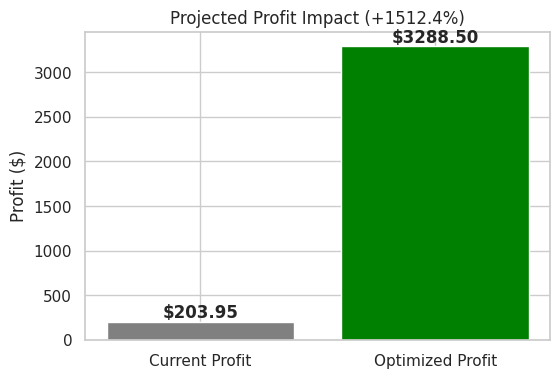

In [ ]:

# 1. Calculate the percentage change
# Formula: ((New - Old) / Old) * 100
if cur_profit > 0:
    pct_increase = ((opt_profit - cur_profit) / cur_profit) * 100
else:
    # If current profit was negative or zero, we handle it gracefully
    pct_increase = 0
    print("Note: Current profit was 0 or negative, so % calculation is skew.")

print(f"Percentage Increase in Profit: {pct_increase:.1f}%")

# 3. Visual Proof (Optional but cool to see)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
bars = plt.bar(['Current Profit', 'Optimized Profit'], [cur_profit, opt_profit], color=['grey', 'green'])
plt.title(f"Projected Profit Impact (+{pct_increase:.1f}%)")
plt.ylabel("Profit ($)")

# Add text labels on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'${yval:.2f}', ha='center', va='bottom', fontweight='bold')

plt.show()